In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load
x=pd.read_csv('Linear_x_Train.csv')
y=pd.read_csv('Linear_y_Train.csv')

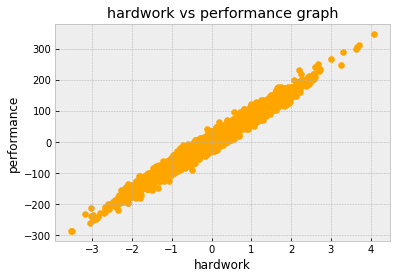

In [3]:
#visualize
plt.style.use('bmh')
plt.scatter(x,y,color='orange')
plt.title("hardwork vs performance graph")
plt.xlabel("hardwork")
plt.ylabel("performance")
plt.show()

In [4]:
x.shape,y.shape

((3750, 1), (3750, 1))

In [5]:
#convert x and y to numpy arrays
x=x.values
y=y.values

In [6]:
#normalisation
u=x.mean()
std=x.std()
x=(x-u)/std

In [7]:
print(x)
print(std)

[[-0.25352061]
 [-0.55541377]
 [ 1.07380656]
 ...
 [-0.26950343]
 [ 1.72730762]
 [-0.4575866 ]]
0.9920801322508517


# Section-2 Linear Regression 

In [8]:
def hypothesis(x,theta):
    #theta=[theta[0],theta[1]]
    y_=theta[0]+theta[1]*x
    return y_
def  gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y_=hypothesis(x,theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*x
    return grad/m
def error(X,Y,theta):
    m=X.shape[0]
    error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        error+=(y_-Y[i])**2
    return error/m
def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    #here what we are doing is checking how the value of theta changes
    theta_list=[]
    for i in range(max_steps):
        #compute grad
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        #update theta
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list

In [9]:
theta,error_list,theta_list=gradientDescent(x,y)

In [10]:
theta,theta_list


(array([ 0.6838508 , 79.90361453]),
 [(0.06838689680155924, 7.990573694249979),
  (0.12993510392296198, 15.182090019074964),
  (0.18532849033222443, 21.654454711417454),
  (0.23518253810056078, 27.479582934525695),
  (0.2800511810920641, 32.72219833532309),
  (0.3204329597844162, 37.44055219604077),
  (0.35677656060753327, 41.68707067068668),
  (0.3894858013483388, 45.508937297867995),
  (0.41892411801506385, 48.94861726233117),
  (0.4454186030151161, 52.044329230348026),
  (0.46926363951516337, 54.83047000156319),
  (0.490724172365206, 57.337996695656855),
  (0.5100386519302443, 59.594770720341145),
  (0.5274216835387786, 61.62586734255701),
  (0.5430664119864597, 63.45385430255129),
  (0.5571466675893725, 65.09904256654615),
  (0.569818897631994, 66.57971200414151),
  (0.5812239046703536, 67.91231449797735),
  (0.591488411004877, 69.11165674242959),
  (0.6007264667059482, 70.19106476243661),
  (0.6090407168369123, 71.16253198044294),
  (0.6165235419547797, 72.03685247664862),
  (0.62

In [11]:
error_list 

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

Text(0.5, 1.0, 'reduction of error vs time')

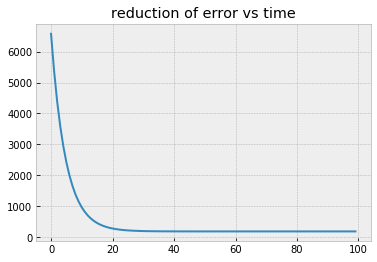

In [12]:
plt.plot(error_list)
plt.title("reduction of error vs time")

In [13]:
#prediction and best line
y_=hypothesis(x,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


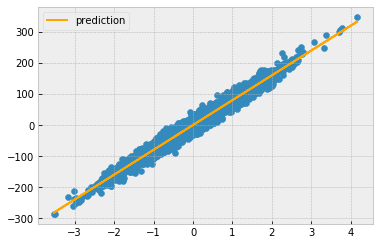

In [14]:
#training +prediction
plt.scatter(x,y)
plt.plot(x,y_,color='orange',label='prediction')
plt.legend()
plt.show()

In [19]:
x_test=pd.read_csv('Linear_X_Test.csv').values
y_test=hypothesis(x_test,theta)

In [20]:
df=pd.DataFrame(y_test,columns=["y"])


In [21]:
df.to_csv('y_prediction1.csv',index=False)

In [22]:
def r2_score(Y,Y_):
    #instead of loop np.sum is recommended bcz it is fast
    num=np.sum((Y-Y_)**2)
    deno=np.sum((Y-Y.mean())**2)
    score=(1- num/deno)
    return score*100
    

In [23]:
r2_score(y,y_)

97.09612226971643